In [3]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

Saving clustering.csv to clustering.csv


In [6]:
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


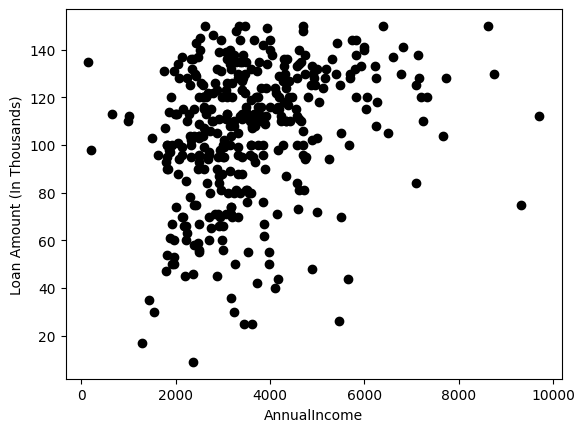

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('clustering.csv')
data.head()

X = data[["LoanAmount","ApplicantIncome"]]
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

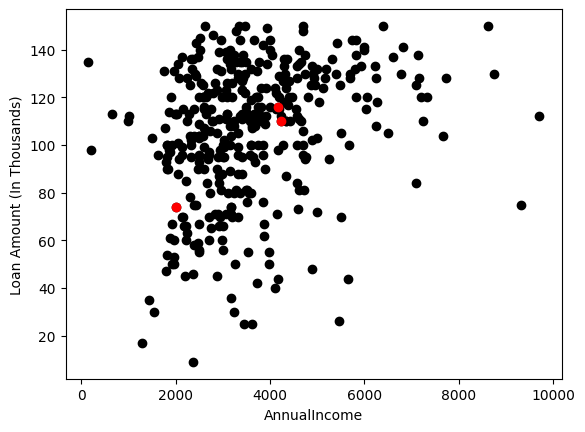

In [18]:
K=3
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [19]:
K = 3
Centroids = X.sample(n=K).reset_index(drop=True)

X['Cluster'] = -1
diff = float('inf')
j = 0

while diff != 0:
    distances = []
    for i in range(K):
        centroid = Centroids.loc[i]
        dist = np.sqrt((X["ApplicantIncome"] - centroid["ApplicantIncome"])**2 +
                       (X["LoanAmount"] - centroid["LoanAmount"])**2)
        distances.append(dist)

    distance_matrix = np.array(distances).T
    X['Cluster'] = np.argmin(distance_matrix, axis=1)

    Centroids_new = X.groupby("Cluster")[["ApplicantIncome", "LoanAmount"]].mean().reset_index(drop=True)

    if j != 0:
        diff = np.sum((Centroids_new - Centroids)**2).sum()
        print(f"Iteration {j}, centroid shift: {diff}")

    Centroids = Centroids_new.copy()
    j += 1

Iteration 1, centroid shift: 297969.5751977878
Iteration 2, centroid shift: 203562.32017293567
Iteration 3, centroid shift: 149195.41331195782
Iteration 4, centroid shift: 88857.17478594134
Iteration 5, centroid shift: 69799.65565077047
Iteration 6, centroid shift: 18835.674644158782
Iteration 7, centroid shift: 22905.04592833404
Iteration 8, centroid shift: 33989.11455709778
Iteration 9, centroid shift: 23432.798814373662
Iteration 10, centroid shift: 20085.12524874721
Iteration 11, centroid shift: 21416.580554275693
Iteration 12, centroid shift: 3877.4065853651678
Iteration 13, centroid shift: 1103.334791059721
Iteration 14, centroid shift: 3286.583586883461
Iteration 15, centroid shift: 2791.550001119641
Iteration 16, centroid shift: 165.35312305777637
Iteration 17, centroid shift: 41.91875803147772
Iteration 18, centroid shift: 166.90181802049491
Iteration 19, centroid shift: 1005.2870704590604
Iteration 20, centroid shift: 0.0


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs

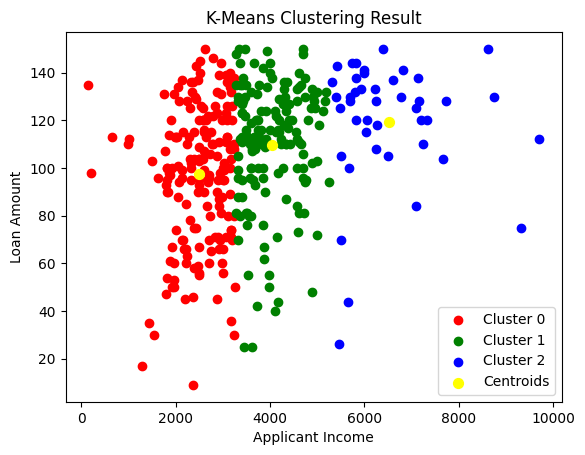

In [23]:
colors = ['red', 'green', 'blue']
for i in range(K):
    cluster_data = X[X['Cluster'] == i]
    plt.scatter(cluster_data['ApplicantIncome'], cluster_data['LoanAmount'], c=colors[i], label=f'Cluster {i}')

plt.scatter(Centroids['ApplicantIncome'], Centroids['LoanAmount'], c='yellow', marker='.', s=200, label='Centroids')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend()
plt.title('K-Means Clustering Result')
plt.show()